# Information Based Models

## Javier Alejandro Fajardo López

### Paqueterías

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.optimize import minimize


### Funciones

In [135]:
import math
import numpy as np
from scipy.integrate import quad


def erlang(k, lamb, S):
    return ((lamb ** k) * (S ** (k - 1))) * np.exp(-lamb * S) / math.factorial(k - 1)


def p_lb(spreads):
    return np.maximum(0.5 - 0.08 * spreads, 0)


def p_ls(spreads):
    return np.maximum(0.5 - 0.08 * spreads, 0)


def objective_function(x, s0, pi, k, lamb):
    a, b = x

    total_revenue = ((1 - pi)* (p_lb(a - s0) * (a - s0) + (p_ls(s0 - b) * (s0 - b)))
        - pi* (quad(lambda S: (S - a) * erlang(k, lamb, S), a, np.inf)[0]
            + quad(lambda S: (b - S) * erlang(k, lamb, S), 0, b)[0]))
    return -total_revenue

    

### Distribución Erlang

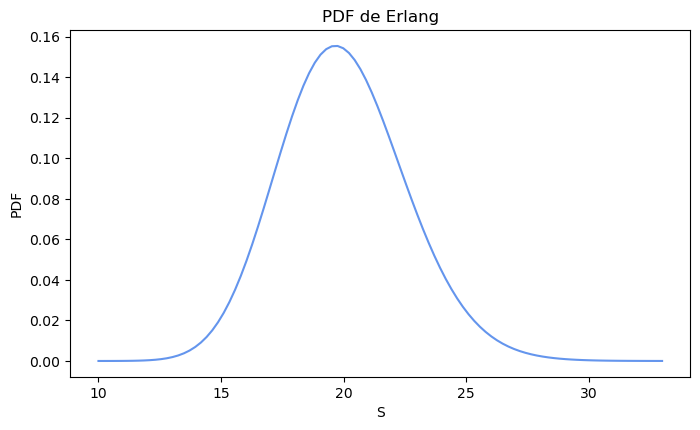

In [136]:
S = np.linspace(10, 33, 100)
k = 60
lamb = 3

plt.figure(figsize=(8,4.5))
plt.plot(S, erlang(k, lamb, S), color='cornflowerblue')
plt.title(f'PDF de Erlang')
plt.xlabel('S')
plt.ylabel('PDF')
plt.show()

### Expected Revenues

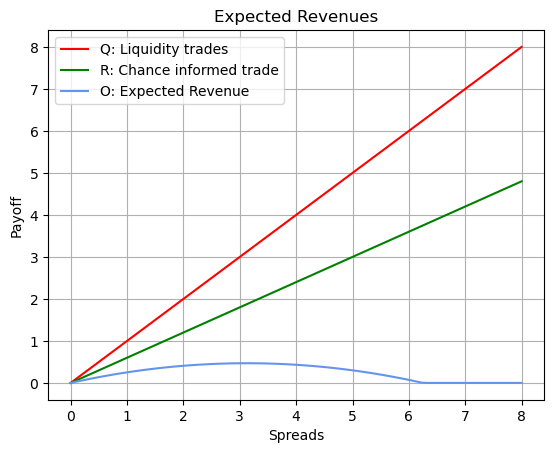

In [137]:
Spreads = np.linspace(0, 8, 100) 
pi = 0.4

plt.plot(Spreads, Spreads, label='Q: Liquidity trades', color='red')
plt.plot(Spreads, (1-pi)* Spreads , label='R: Chance informed trade', color='green')
plt.plot(Spreads,  p_lb(Spreads) * (1-pi) * Spreads, label='O: Expected Revenue', color='cornflowerblue')

plt.title('Expected Revenues')
plt.xlabel('Spreads')
plt.ylabel('Payoff')
plt.grid()
plt.legend()
plt.show()


### Optimized Bid & Ask

In [138]:
S0 = 19.90
values = [24.0, 16.0]
bounds = [(values[1], None), (0, None)]

optimized_ba = minimize(
    objective_function,
    values,
    args=(S0, pi, k, lamb),
    method='SLSQP',
    bounds=bounds,
)

opt_a, opt_b = optimized_ba.x

print('Optimal Bid:', opt_b)
print('Optimal Ask:', opt_a)


Optimal Bid: 16.454305594532325
Optimal Ask: 23.42986866999321


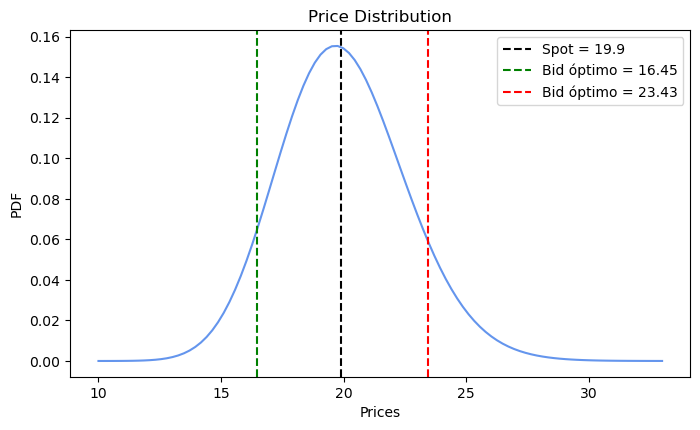

In [139]:
plt.figure(figsize=(8,4.5))
plt.plot(S, erlang(k, lamb, S), color='cornflowerblue')
plt.axvline(S0, color="black", linestyle="--", label=f"Spot = {S0}")
plt.axvline(opt_b, color="green", linestyle="--", label=f"Bid óptimo = {opt_b.round(2)}")
plt.axvline(opt_a, color="red", linestyle="--", label=f"Bid óptimo = {opt_a.round(2)}")
plt.title("Price Distribution")
plt.xlabel("Prices")
plt.ylabel("PDF")
plt.legend()
plt.show()
